In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("crmls_last_6_months.csv", low_memory=False)

In [13]:
df.head()

,BuyerAgentAOR,ListAgentAOR,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,OriginalListPrice,ListingKey,ListAgentEmail,...,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet,MiddleOrJuniorSchoolDistrict,latfilled,lonfilled
0,Glendale,Glendale,NaN,NaN,NaN,NaN,NaN,3350000.0,552665323,Listings@LockerRealty.com,...,NaN,False,0.0,NaN,91331,NaN,88445.0,NaN,NaN,NaN
1,InlandValleys,InlandValleys,NaN,True,NaN,NaN,NaN,125000.0,551977092,Patriciapandeyrealtor@gmail.com,...,NaN,False,NaN,NaN,92530,0.0,9148.0,NaN,NaN,NaN
2,PacificWest,PacificWest,NaN,True,NaN,NaN,NaN,300000.0,551927931,joshuacho1004@gmail.com,...,NaN,False,NaN,NaN,92356,0.0,6969600.0,NaN,NaN,NaN
3,Mlslistings,Mlslistings,"Carpet,Laminate,Tile",False,NaN,NaN,NaN,800000.0,544420694,assistant@danmoskowitz.com,...,NaN,False,0.0,Other,95122,NaN,6418.0,NaN,NaN,NaN
4,LakeCounty,LakeCounty,NaN,True,NaN,NaN,NaN,21500.0,516603298,jan@zapcom.net,...,NaN,False,NaN,NaN,95464,0.0,4559.0,NaN,NaN,NaN


In [14]:
# Select the variables that want to analyze:
cols = [
    'ClosePrice', 'NewConstructionYN', 'GarageSpaces', 'HighSchoolDistrict',
    'PostalCode', 'AssociationFee', 'LotSizeSquareFeet'
]

df_selected = df[cols].dropna()

In [15]:
# Correlation Analysis
# For numeric columns
numeric_cols = ['GarageSpaces', 'AssociationFee', 'LotSizeSquareFeet']

for col in numeric_cols:
    corr = df_selected['ClosePrice'].corr(df_selected[col])
    print(f'Correlation between ClosePrice and {col}: {corr:.2f}')

Correlation between ClosePrice and GarageSpaces: 0.01
Correlation between ClosePrice and AssociationFee: 0.04
Correlation between ClosePrice and LotSizeSquareFeet: -0.00


In [16]:
# For categorical features
# Mean close price by NewConstructionYN
print(df_selected.groupby('NewConstructionYN')['ClosePrice'].mean())

# Mean close price by HighSchoolDistrict (top 10 for brevity)
print(df_selected.groupby('HighSchoolDistrict')['ClosePrice'].mean().sort_values(ascending=False).head(10))

NewConstructionYN
False    821948.760265
True     888937.074594
Name: ClosePrice, dtype: float64
HighSchoolDistrict
Sweetwater Union                 1.075073e+07
Tamalpais Union                  5.400000e+06
Round Valley Unified             3.000000e+06
Morgan Hill Unified              2.584366e+06
Carmel Unified                   2.569521e+06
Newport Mesa Unified             2.411961e+06
Somis Union Elementary School    2.300000e+06
La Jolla                         2.278946e+06
San Dieguito Union               2.278700e+06
Manhattan Unified                2.204259e+06
Name: ClosePrice, dtype: float64


In [17]:
# Observation: the new construction close price is higher. 
# And obviously Sweetwater Union and Tamalpais Union have higher close price of houses. 

In [18]:
# Scatter plot for numeric features

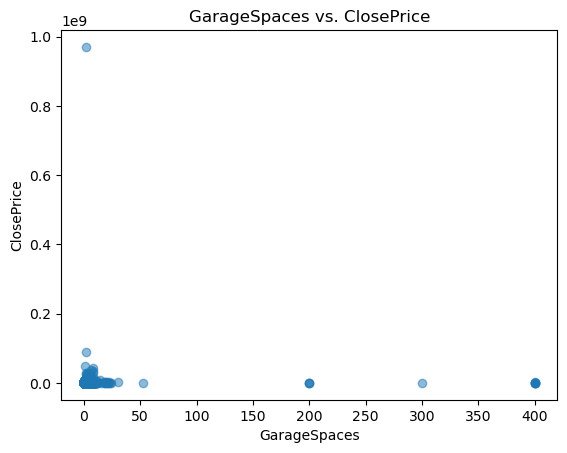

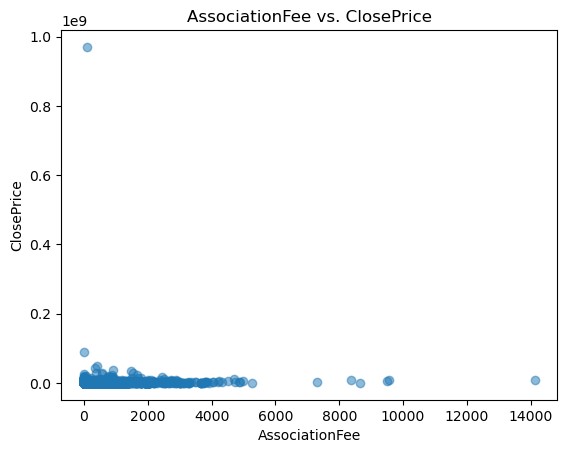

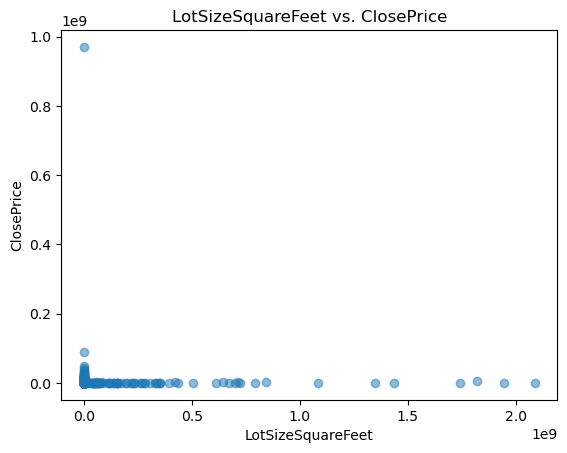

In [19]:
for col in numeric_cols:
    plt.figure()
    plt.scatter(df_selected[col], df_selected['ClosePrice'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('ClosePrice')
    plt.title(f'{col} vs. ClosePrice')
    plt.show()

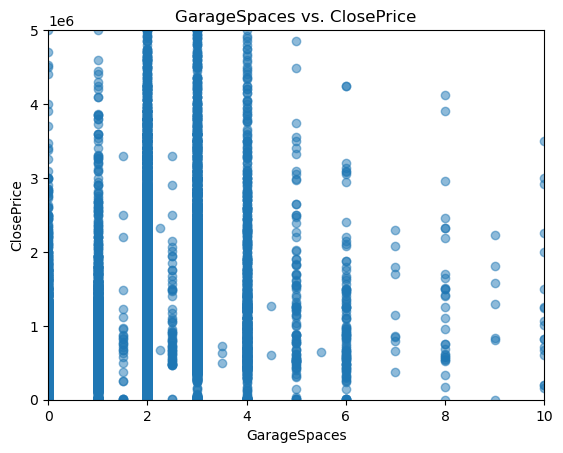

In [20]:
# Make the plots more visible
# Limit the Access Range
plt.scatter(df_selected['GarageSpaces'], df_selected['ClosePrice'], alpha=0.5)
plt.xlabel('GarageSpaces')
plt.ylabel('ClosePrice')
plt.title('GarageSpaces vs. ClosePrice')
plt.xlim(0, 10)      # Only show 0–10 garage spaces
plt.ylim(0, 5e6)     # Only show up to $5 million (or pick your range)
plt.show()

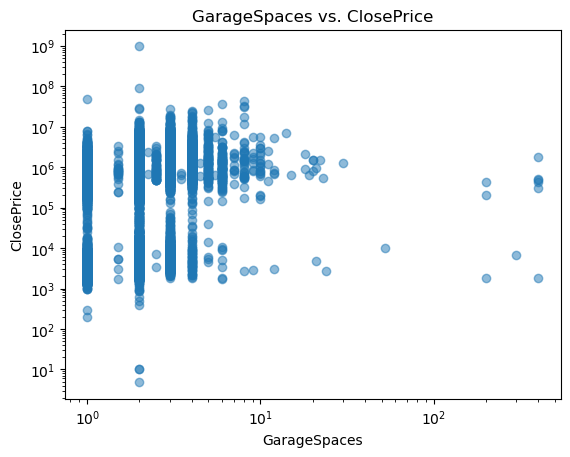

In [21]:
# Plot Aggregated Averages
plt.scatter(df_selected['GarageSpaces'], df_selected['ClosePrice'], alpha=0.5)
plt.xlabel('GarageSpaces')
plt.ylabel('ClosePrice')
plt.title('GarageSpaces vs. ClosePrice')
plt.xscale('log')   # Try log scale for GarageSpaces
plt.yscale('log')   # Or for ClosePrice
plt.show()

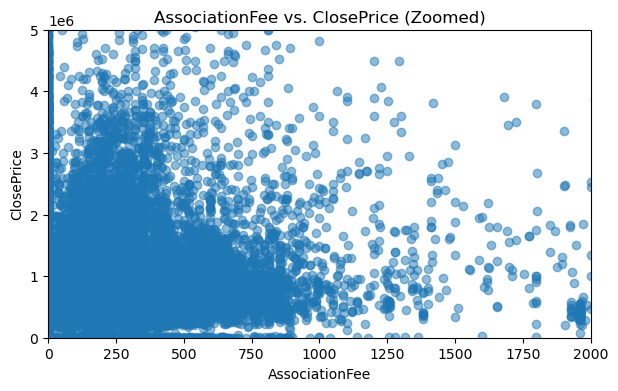

In [22]:
# Zoom in on Assocation Fee
plt.figure(figsize=(7, 4))
plt.scatter(df_selected['AssociationFee'], df_selected['ClosePrice'], alpha=0.5)
plt.xlabel('AssociationFee')
plt.ylabel('ClosePrice')
plt.title('AssociationFee vs. ClosePrice (Zoomed)')
plt.xlim(0, 2000)
plt.ylim(0, 5_000_000)
plt.show()

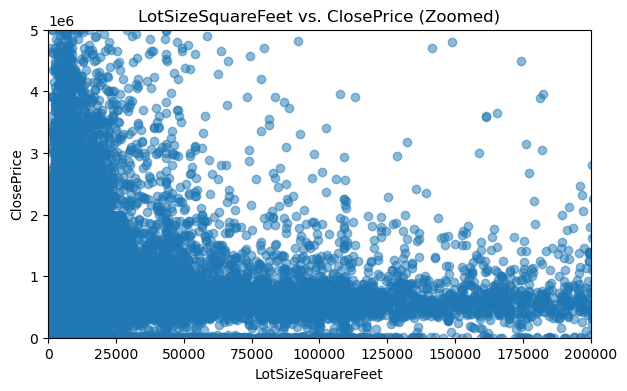

In [23]:
# Log on LotSizeSquareFeet
plt.figure(figsize=(7, 4))
plt.scatter(df_selected['LotSizeSquareFeet'], df_selected['ClosePrice'], alpha=0.5)
plt.xlabel('LotSizeSquareFeet')
plt.ylabel('ClosePrice')
plt.title('LotSizeSquareFeet vs. ClosePrice (Zoomed)')
plt.xlim(0, 200_000)
plt.ylim(0, 5_000_000)
plt.show()

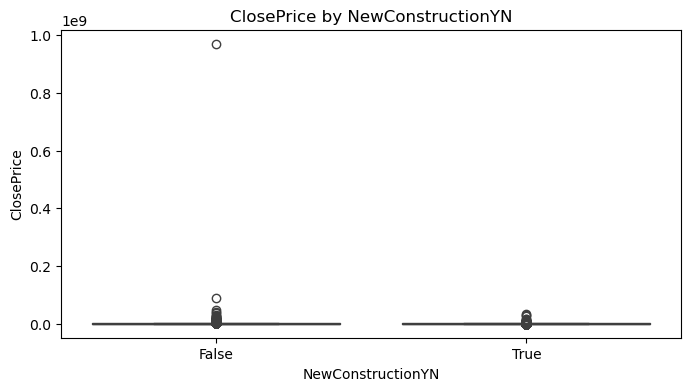

In [24]:
# Boxplot for Categorical Features
plt.figure(figsize=(8,4))
sns.boxplot(x='NewConstructionYN', y='ClosePrice', data=df_selected)
plt.title('ClosePrice by NewConstructionYN')
plt.show()

In [25]:
# For School Distrct Correlation
# Step 1: Find Top & Bottom Districts by Mean Price
# Calculate mean price by district
district_means = df_selected.groupby('HighSchoolDistrict')['ClosePrice'].mean()

# Get top 5 and bottom 5 (excluding districts with very few samples, e.g., less than 10 listings)
district_counts = df_selected['HighSchoolDistrict'].value_counts()
valid_districts = district_counts[district_counts >= 10].index  # only districts with >=10 listings

filtered_means = district_means[valid_districts]
top5 = filtered_means.sort_values(ascending=False).head(5).index
bottom5 = filtered_means.sort_values().head(5).index

selected_districts = list(top5) + list(bottom5)
df_selected_districts = df_selected[df_selected['HighSchoolDistrict'].isin(selected_districts)]

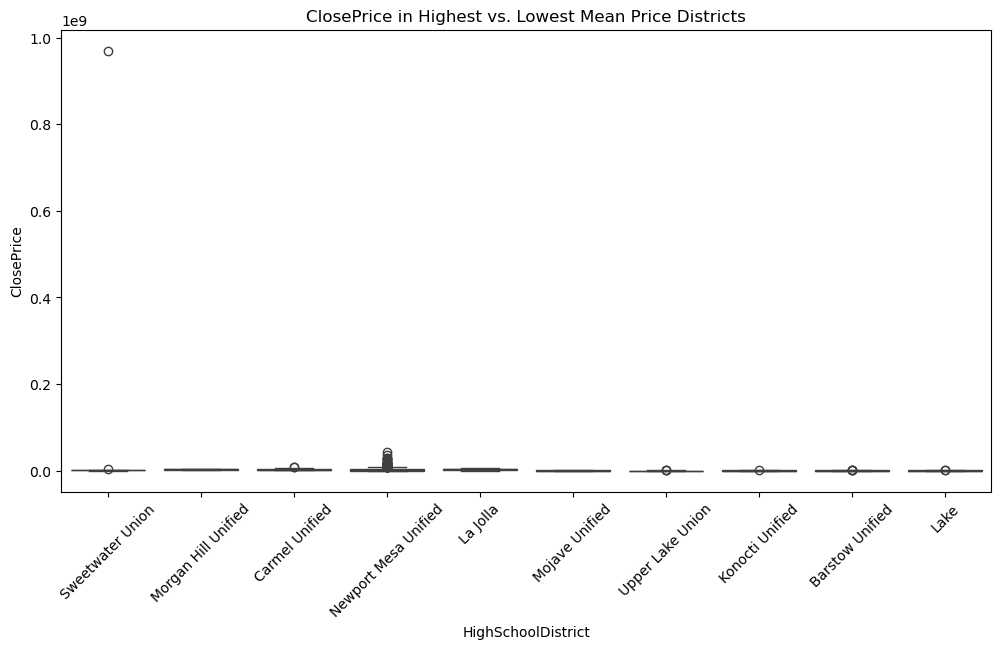

In [26]:
# Step 2: Boxplot for Highest vs. Lowest Priced Districts
plt.figure(figsize=(12,6))
sns.boxplot(x='HighSchoolDistrict', y='ClosePrice', data=df_selected_districts, order=selected_districts)
plt.xticks(rotation=45)
plt.title('ClosePrice in Highest vs. Lowest Mean Price Districts')
plt.show()

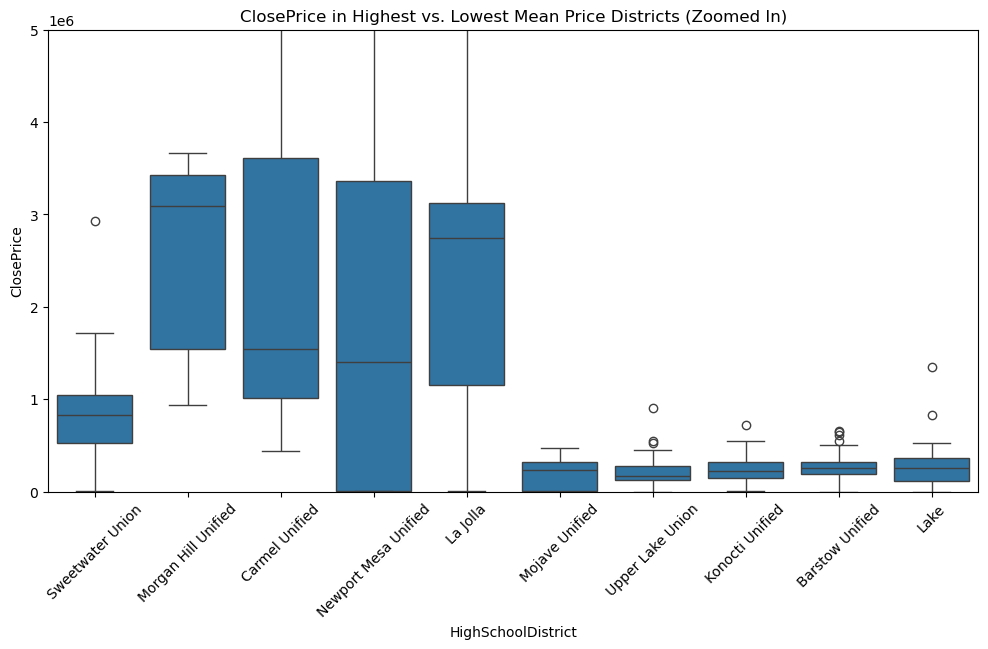

In [27]:
# Set a Y-axis Limit
plt.figure(figsize=(12,6))
sns.boxplot(x='HighSchoolDistrict', y='ClosePrice', data=df_selected_districts, order=selected_districts)
plt.ylim(0, 5_000_000)  # Set y-axis from $0 to $5,000,000
plt.xticks(rotation=45)
plt.title('ClosePrice in Highest vs. Lowest Mean Price Districts (Zoomed In)')
plt.show()

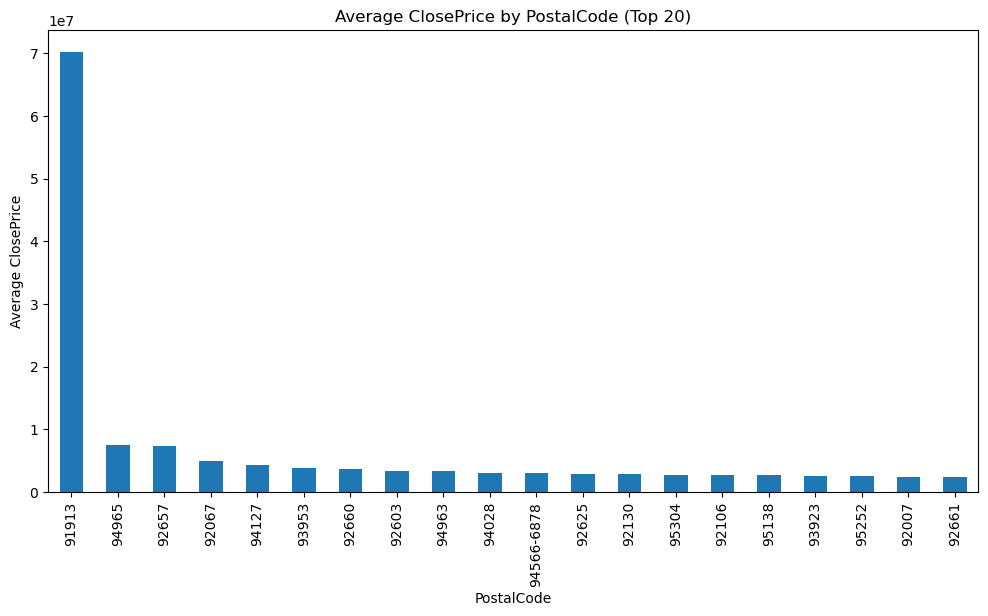

In [28]:
# Postal Code / Close Price
postal_avg = df_selected.groupby('PostalCode')['ClosePrice'].mean().sort_values(ascending=False).head(20)
postal_avg.plot(kind='bar', figsize=(12,6), title='Average ClosePrice by PostalCode (Top 20)')
plt.ylabel('Average ClosePrice')
plt.show()

In [29]:
# Check R squared
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

for col in numeric_cols:
    X = df_selected[[col]]
    y = df_selected['ClosePrice']
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    print(f'R² between ClosePrice and {col}: {r2:.2f}')

R² between ClosePrice and GarageSpaces: 0.00
R² between ClosePrice and AssociationFee: 0.00
R² between ClosePrice and LotSizeSquareFeet: 0.00


In [30]:
df.columns

Index(['BuyerAgentAOR', 'ListAgentAOR', 'Flooring', 'ViewYN', 'WaterfrontYN',
       'BasementYN', 'PoolPrivateYN', 'OriginalListPrice', 'ListingKey',
       'ListAgentEmail', 'CloseDate', 'ClosePrice', 'ListAgentFirstName',
       'ListAgentLastName', 'Latitude', 'Longitude', 'UnparsedAddress',
       'PropertyType', 'LivingArea', 'ListPrice', 'DaysOnMarket',
       'ListOfficeName', 'BuyerOfficeName', 'CoListOfficeName',
       'ListAgentFullName', 'CoListAgentFirstName', 'CoListAgentLastName',
       'BuyerAgentMlsId', 'BuyerAgentFirstName', 'BuyerAgentLastName',
       'FireplacesTotal', 'AssociationFeeFrequency', 'AboveGradeFinishedArea',
       'ListingKeyNumeric', 'MLSAreaMajor', 'TaxAnnualAmount',
       'CountyOrParish', 'MlsStatus', 'ElementarySchool', 'AttachedGarageYN',
       'ParkingTotal', 'BuilderName', 'PropertySubType', 'LotSizeAcres',
       'SubdivisionName', 'BuyerOfficeAOR', 'YearBuilt', 'StreetNumberNumeric',
       'ListingId', 'BathroomsTotalInteger', 'City', '

In [31]:
## Longitute and Latitude with ClosePrice
# Add longitude and latitude to your columns list
cols_geo = [
    'ClosePrice', 'Latitude', 'Longitude'
]

# Filter to only rows with NO missing lat/lon/price
df_geo = df[cols_geo].dropna()
df_geo.head()

,ClosePrice,Latitude,Longitude
0,2100000.0,34.271680,-118.403023
1,125000.0,33.668691,-117.334438
2,135000.0,34.499080,-116.857925
3,1120000.0,37.330858,-121.849610
4,4000.0,39.125024,-122.860206


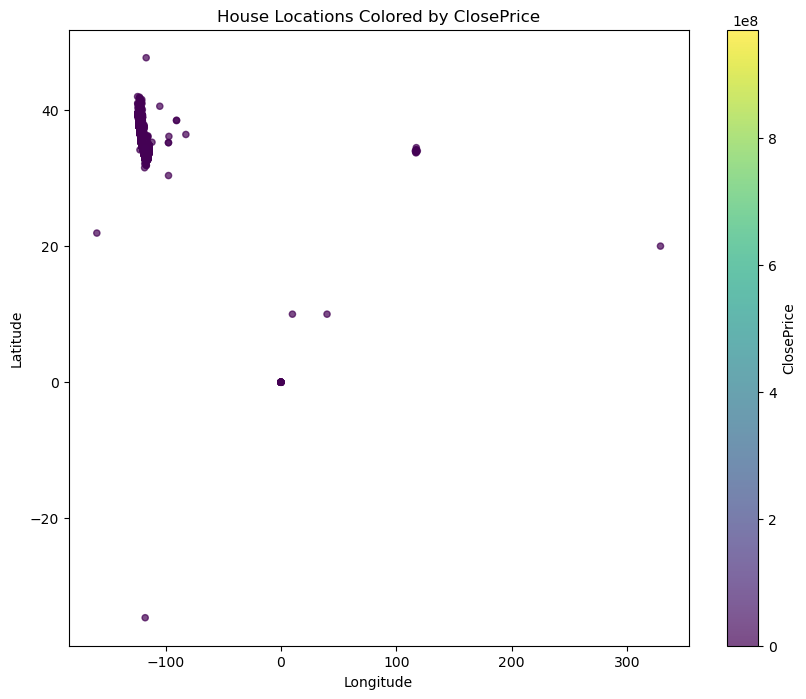

In [32]:
#  Clusters of high or low prices will appear as color groups
plt.figure(figsize=(10, 8))
sc = plt.scatter(
    df_geo['Longitude'],    # Longitude (x)
    df_geo['Latitude'],    # Latitude (y)
    c=df_geo['ClosePrice'], # Color by price
    cmap='viridis',
    s=20,
    alpha=0.7
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Locations Colored by ClosePrice')
plt.colorbar(sc, label='ClosePrice')
plt.show()

(20.0, 60.0)

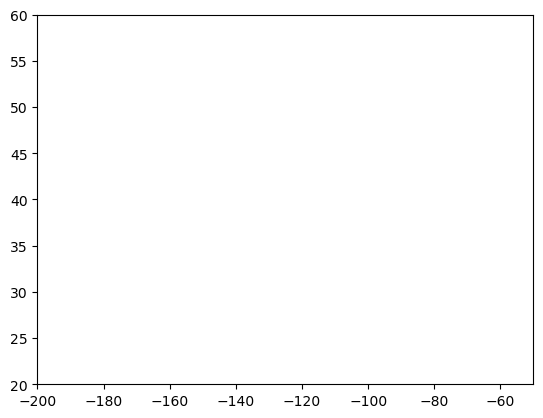

In [33]:
# Zoom in
plt.xlim(-200, -50)  # Set to longitude range
plt.ylim(20, 60)      # Set to latitude range

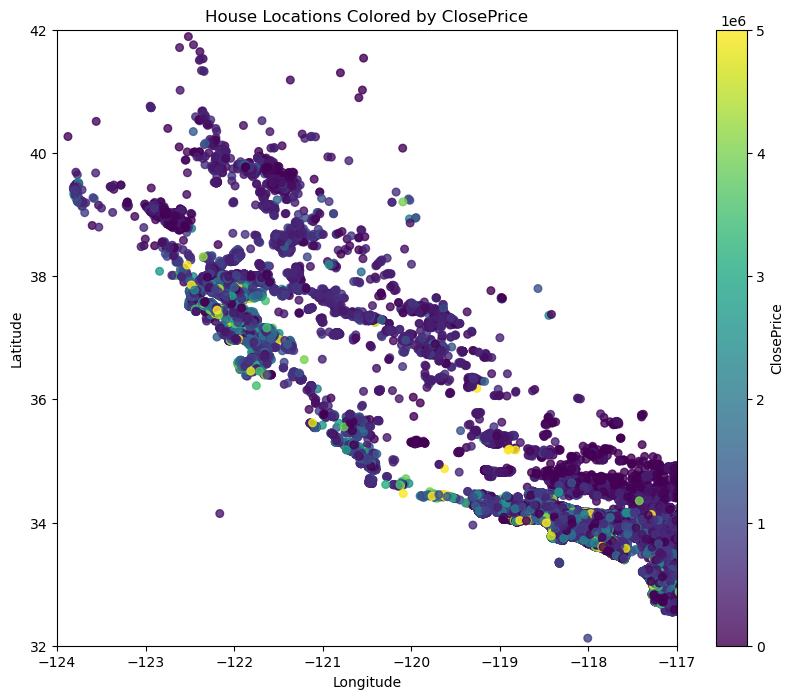

In [34]:
## zoom into california
plt.figure(figsize=(10, 8))
sc = plt.scatter(
    df_geo['Longitude'],
    df_geo['Latitude'],
    c=df_geo['ClosePrice'].clip(0, 5_000_000),   # Cap color at $5M to make scale more useful
    cmap='viridis',
    s=30,
    alpha=0.8
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Locations Colored by ClosePrice')
plt.colorbar(sc, label='ClosePrice')
plt.xlim(-124, -117)
plt.ylim(32, 42)
plt.show()

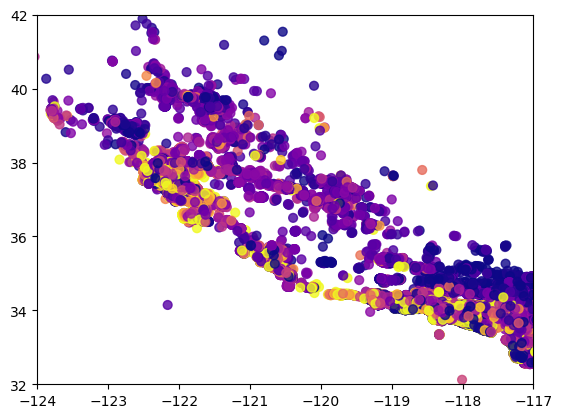

In [35]:
# Make color more sensitive to price
sc = plt.scatter(
    df_geo['Longitude'],
    df_geo['Latitude'],
    c=df_geo['ClosePrice'].clip(0, 2_000_000),  # Try 2M, or adjust as needed!
    cmap='plasma',      # Try different color maps: 'plasma', 'inferno', 'coolwarm'
    s=40,
    alpha=0.8
)
plt.xlim(-124, -117)
plt.ylim(32, 42)
plt.show()

In [36]:
# Filter for California-like locations
df_geo_ca = df_geo[
    (df_geo['Latitude'] > 32) & (df_geo['Latitude'] < 42) &
    (df_geo['Longitude'] > -124) & (df_geo['Longitude'] < -117)
]

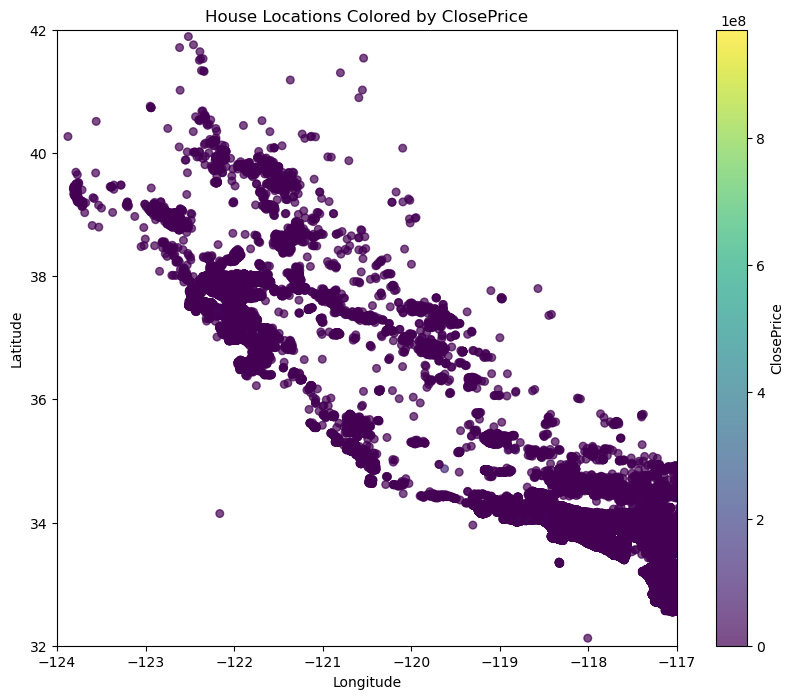

In [37]:
# Zoom in
plt.figure(figsize=(10, 8))
plt.scatter(
    df_geo['Longitude'],
    df_geo['Latitude'],
    c=df_geo['ClosePrice'],
    cmap='viridis',
    s=30,
    alpha=0.7
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Locations Colored by ClosePrice')
plt.xlim(-124, -117)
plt.ylim(32, 42)
plt.colorbar(label='ClosePrice')
plt.show()

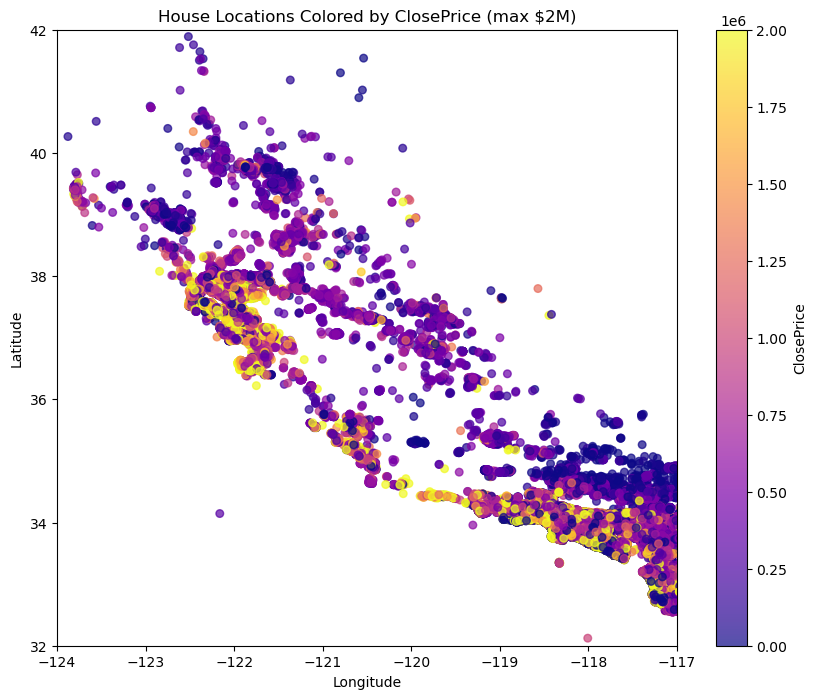

In [38]:
# Color Sensitive
plt.figure(figsize=(10, 8))
plt.scatter(
    df_geo['Longitude'],
    df_geo['Latitude'],
    c=df_geo['ClosePrice'].clip(0, 2_000_000),  # Cap at $2M
    cmap='plasma',   # Brighter, more sensitive color map
    s=30,
    alpha=0.7
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Locations Colored by ClosePrice (max $2M)')
plt.xlim(-124, -117)
plt.ylim(32, 42)
plt.colorbar(label='ClosePrice')
plt.show()

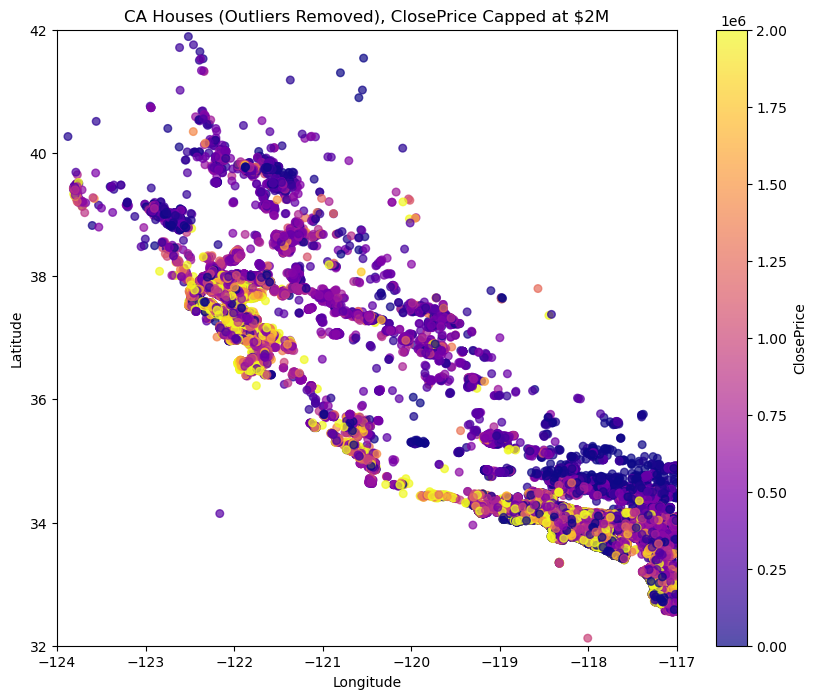

In [39]:
# Remove Outliers
df_ca = df_geo[
    (df_geo['Latitude'] >= 32) & (df_geo['Latitude'] <= 42) &
    (df_geo['Longitude'] >= -124) & (df_geo['Longitude'] <= -117)
]
plt.figure(figsize=(10, 8))
plt.scatter(
    df_ca['Longitude'],
    df_ca['Latitude'],
    c=df_ca['ClosePrice'].clip(0, 2_000_000),
    cmap='plasma',
    s=30,
    alpha=0.7
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('CA Houses (Outliers Removed), ClosePrice Capped at $2M')
plt.xlim(-124, -117)
plt.ylim(32, 42)
plt.colorbar(label='ClosePrice')
plt.show()

In [40]:
# r value
print("Correlation with Latitude:", df_ca['ClosePrice'].corr(df_ca['Latitude']))
print("Correlation with Longitude:", df_ca['ClosePrice'].corr(df_ca['Longitude']))

Correlation with Latitude: 0.013223946602871151
Correlation with Longitude: -0.03195903439687812


In [41]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare X and y
X = df_ca[['Latitude', 'Longitude']]
y = df_ca['ClosePrice']

model = LinearRegression()
model.fit(X, y)
r2 = model.score(X, y)  # R-squared, how much variation in price explained by location

print("Regression coefficients (Latitude, Longitude):", model.coef_)
print("Intercept:", model.intercept_)
print(f"R^2: {r2:.3f}")

Regression coefficients (Latitude, Longitude): [-383287.63248985 -431354.46652204]
Intercept: -37042997.961629614
R^2: 0.003


C:\Users\sarah\AppData\Local\Temp\ipykernel_18456\2458588419.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ca['cluster'] = kmeans.fit_predict(df_ca[['Latitude', 'Longitude']])


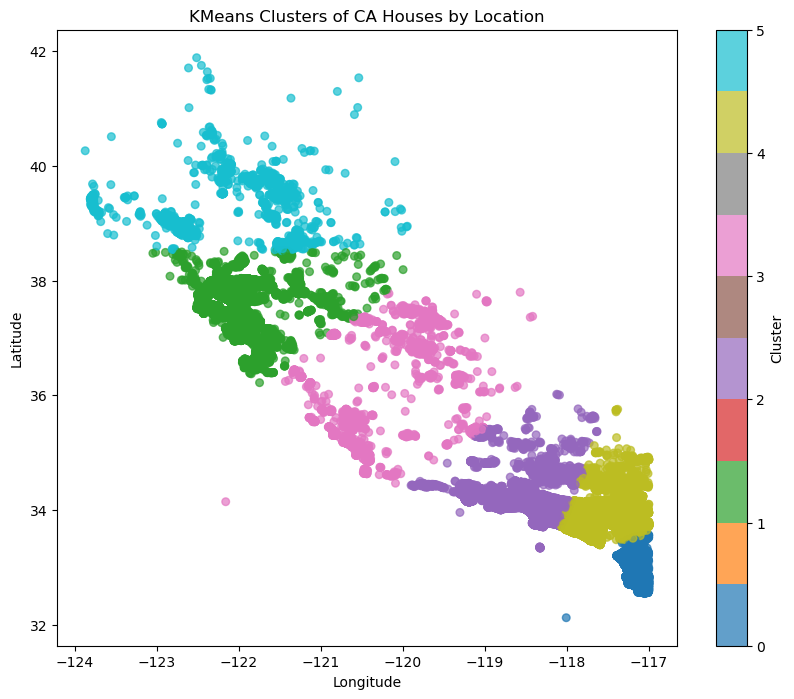

In [42]:
# Cluster Analysis: Find Hot Spots Using KMeans
from sklearn.cluster import KMeans
import numpy as np

# Choose number of clusters (try 5-8 for CA)
kmeans = KMeans(n_clusters=6, random_state=42)
df_ca['cluster'] = kmeans.fit_predict(df_ca[['Latitude', 'Longitude']])

plt.figure(figsize=(10,8))
sc = plt.scatter(
    df_ca['Longitude'], df_ca['Latitude'],
    c=df_ca['cluster'], cmap='tab10', s=30, alpha=0.7
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('KMeans Clusters of CA Houses by Location')
plt.colorbar(sc, label='Cluster')
plt.show()

In [43]:
means = df_ca.groupby('cluster')['ClosePrice'].mean()
print(means.sort_values(ascending=False))

cluster
1    1.311240e+06
0    1.152036e+06
2    8.270108e+05
4    7.175196e+05
3    7.095754e+05
5    3.355498e+05
Name: ClosePrice, dtype: float64


In [44]:
# After plotting house locations colored by price, clear spatial price clusters are visible, 
# often corresponding to known high-value areas such as the Bay Area and coastal Los Angeles.
# After Clustering, the bay area has highest house price

In [45]:
# San Francisco Bay Area: Latitude: ~37.0 to 38.5, Longitude: ~-123.0 to -121.5 BLUE
# Coastal Los Angeles, Latitude: ~33.7 to 34.1; Longitude: ~-118.7 to -118.0 YELLOW

In [46]:
# https://labeledmaps.com/map/california-labeled-map/

In [47]:
# School District 

In [48]:
df_top10 = pd.read_excel('top 10 school district.xlsx')
df_top10

,School District,Region,Comments
0,Sweetwater Union,San Diego,"San Diego, NOT Bay Area or LA Coastal"
1,Tamalpais Union,Bay Area,Marin County (just north of SF)
2,Round Valley Unified,NorCal (Rural),"Mendocino County, remote, north of Bay Area"
3,Morgan Hill Unified,Bay Area,"South Santa Clara County, near San Jose"
4,Carmel Unified,Central Coast,"Carmel/Monterey, not quite Bay or LA"
5,Newport Mesa Unified,Coastal OC,"Newport Beach & Costa Mesa (SoCal, near LA)"
6,Somis Union Elem. School,Ventura County,"Near LA, north of Malibu"
7,La Jolla,San Diego,"San Diego, NOT Bay Area or LA"
8,San Dieguito Union,San Diego,"San Diego, coastal"
9,Manhattan Unified,LA Coastal,"Manhattan Beach, classic LA coastal"


In [49]:
# San Diego city’s approximate longitude and latitude are: Latitude: 32.7157, Longitude: -117.1611

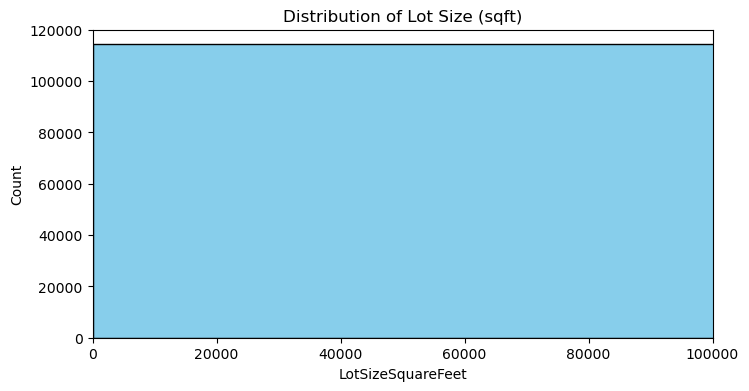

In [104]:
df_distribution = df[['NewConstructionYN', 'GarageSpaces', 'HighSchoolDistrict', 
                     'PostalCode', 'AssociationFee', 'LotSizeSquareFeet']]

plt.figure(figsize=(8, 4))
plt.hist(df_distribution['LotSizeSquareFeet'].dropna(), bins=100, color='skyblue', edgecolor='k')
plt.xlabel('LotSizeSquareFeet')
plt.ylabel('Count')
plt.title('Distribution of Lot Size (sqft)')
plt.xlim(0, 100_000)  # Optional: zoom in to first 100,000 sqft
plt.show()

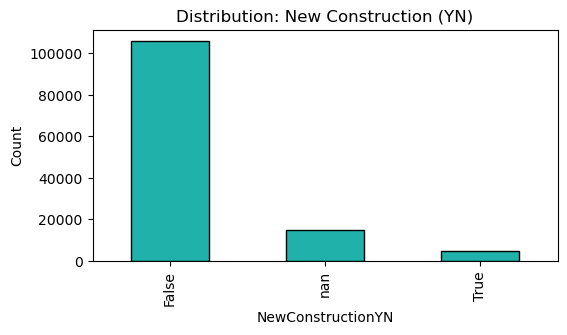

In [106]:
plt.figure(figsize=(6, 3))
df_distribution['NewConstructionYN'].value_counts(dropna=False).plot(
    kind='bar', color='lightseagreen', edgecolor='k')
plt.xlabel('NewConstructionYN')
plt.ylabel('Count')
plt.title('Distribution: New Construction (YN)')
plt.show()

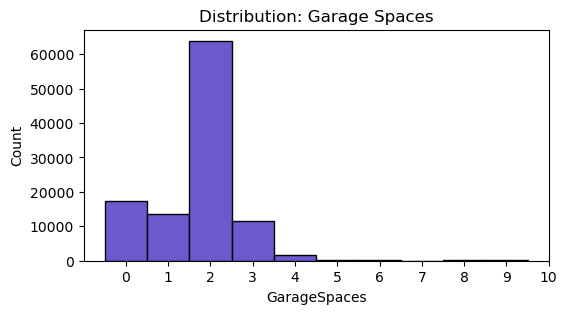

In [108]:
plt.figure(figsize=(6, 3))
plt.hist(df_distribution['GarageSpaces'].dropna(), bins=range(0, 11), 
         color='slateblue', edgecolor='k', align='left')
plt.xlabel('GarageSpaces')
plt.ylabel('Count')
plt.title('Distribution: Garage Spaces')
plt.xticks(range(0, 11))
plt.show()

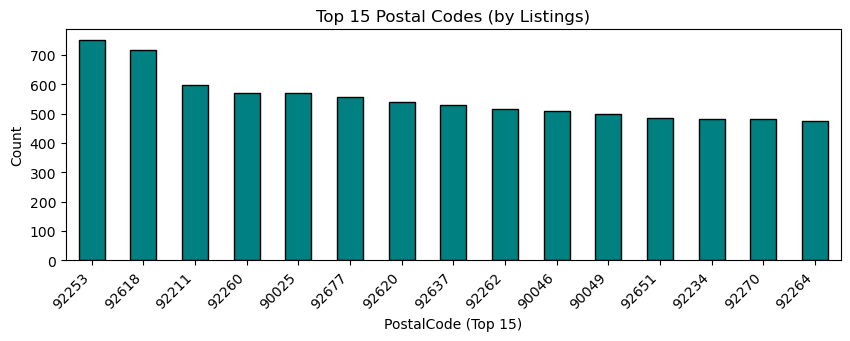

In [112]:
plt.figure(figsize=(10, 3))
df_distribution['PostalCode'].value_counts(dropna=False).head(15).plot(
    kind='bar', color='teal', edgecolor='k')
plt.xlabel('PostalCode (Top 15)')
plt.ylabel('Count')
plt.title('Top 15 Postal Codes (by Listings)')
plt.xticks(rotation=45, ha='right')
plt.show()

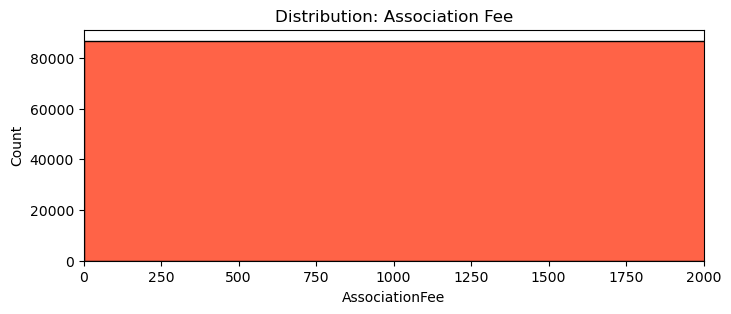

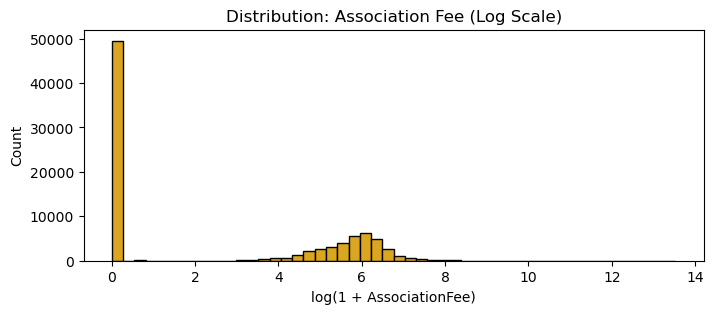

In [114]:
plt.figure(figsize=(8, 3))
plt.hist(df_distribution['AssociationFee'].dropna(), bins=50, color='tomato', edgecolor='k')
plt.xlabel('AssociationFee')
plt.ylabel('Count')
plt.title('Distribution: Association Fee')
plt.xlim(0, 2000)
plt.show()

plt.figure(figsize=(8, 3))
plt.hist(np.log1p(df_distribution['AssociationFee'].dropna()), bins=50, color='goldenrod', edgecolor='k')
plt.xlabel('log(1 + AssociationFee)')
plt.ylabel('Count')
plt.title('Distribution: Association Fee (Log Scale)')
plt.show()

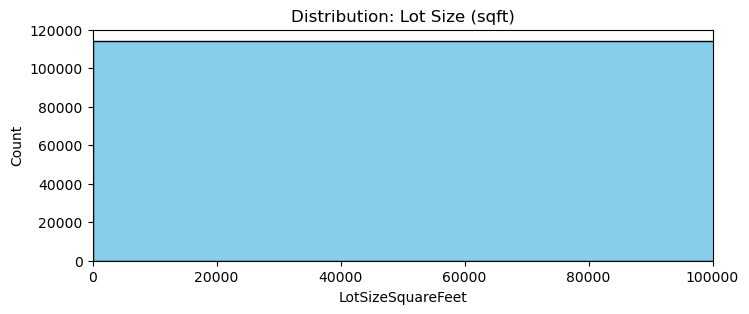

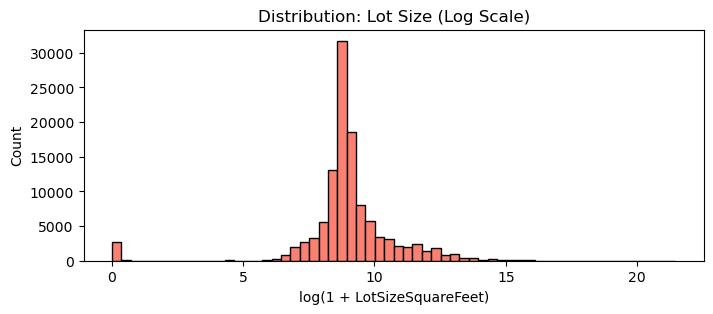

In [116]:
plt.figure(figsize=(8, 3))
plt.hist(df_distribution['LotSizeSquareFeet'].dropna(), bins=100, color='skyblue', edgecolor='k')
plt.xlabel('LotSizeSquareFeet')
plt.ylabel('Count')
plt.title('Distribution: Lot Size (sqft)')
plt.xlim(0, 100_000)
plt.show()

plt.figure(figsize=(8, 3))
plt.hist(np.log1p(df_distribution['LotSizeSquareFeet'].dropna()), bins=60, color='salmon', edgecolor='k')
plt.xlabel('log(1 + LotSizeSquareFeet)')
plt.ylabel('Count')
plt.title('Distribution: Lot Size (Log Scale)')
plt.show()